#Price Forecasting Time Series using Prophet

Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.
In this project we will try to forecast the different petrol prices for the upcoming dates given to us.
We will use Prophet forecasting models to predict the prices.

TimeLine of the project:
1. Data Extraction
2. Data Analysis visualisation
3. Model Building and predictions using Prophet
4. Performance Calculating Error


###1.Data Extraction

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from statsmodels.tsa.stattools import adfuller
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
from prophet import Prophet


In [ ]:
df= pd.read_csv('train_data.csv')

In [ ]:
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [ ]:
df.shape

(813, 2)

In [ ]:
df.nunique()

Date            813
Petrol (USD)    754
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          813 non-null    datetime64[ns]
 1   Petrol (USD)  811 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.8 KB


In [ ]:
df.head()

,Date,Petrol (USD)
0,2003-06-09,74.59
1,2003-06-16,74.47
2,2003-06-23,74.42
3,2003-06-30,74.35
4,2003-07-07,74.28


In [ ]:
df.rename(columns={"Petrol (USD)":"Petrol_price"}, inplace=True)

In [ ]:
df.head()

,Date,Petrol_price
0,2003-06-09,74.59
1,2003-06-16,74.47
2,2003-06-23,74.42
3,2003-06-30,74.35
4,2003-07-07,74.28


In [ ]:
df.describe()

,Petrol_price
count,811.000000
mean,110.330481
std,19.241182
min,74.210000
25%,94.525000
50%,112.420000
75%,128.560000
max,189.510000


In [ ]:
Mx=df['Date'].max()
Mx

Timestamp('2018-12-31 00:00:00')

In [ ]:
Mn=df['Date'].min()
Mn

Timestamp('2003-06-09 00:00:00')

In [ ]:
df.isnull().sum()

Date            0
Petrol_price    2
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df_2018=df[df['Date'].between('2018-01-1' , '2018-12-31')]
df_2017=df[df['Date'].between('2017-01-1' , '2017-12-31')]
df_2016=df[df['Date'].between('2016-01-1' , '2016-12-31')]

In [ ]:
price_2018=df_2018['Petrol_price'].max()
price_2017=df_2017['Petrol_price'].max()
price_2016=df_2016['Petrol_price'].max()
print('Max Price 2018 :', price_2018)
print('Max Price 2017 :', price_2017)
print('Max Price 2016 :', price_2016)


Max Price 2018 : 130.98
Max Price 2017 : 120.2
Max Price 2016 : 116.56


##2. Data Analysis (EDA)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


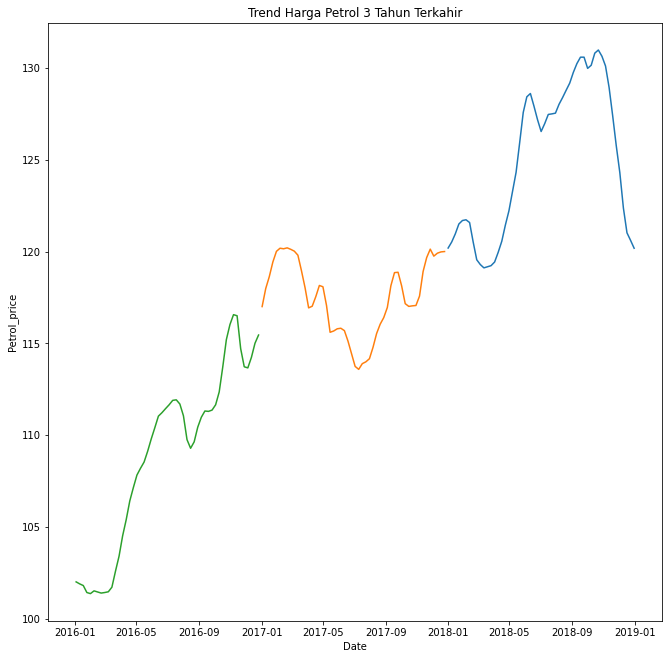

In [ ]:
plt.figure(figsize=(11,11))
sn.lineplot(df_2018['Date'],df_2018['Petrol_price'])
sn.lineplot(df_2017['Date'],df_2017['Petrol_price'])
sn.lineplot(df_2016['Date'],df_2016['Petrol_price'])
plt.title('Trend Harga Petrol 3 Tahun Terkahir')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Trend Harga Petrol 15 tahun Terakhir')

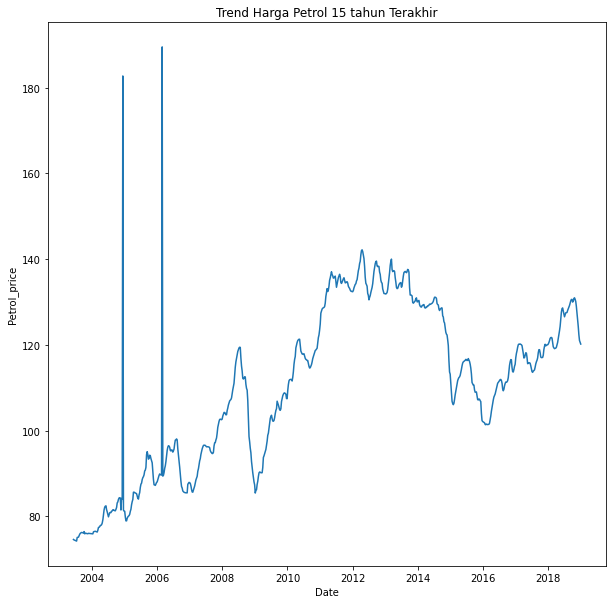

In [ ]:
plt.figure(figsize=(10,10))
sn.lineplot(df['Date'],df['Petrol_price'])
plt.title('Trend Harga Petrol 15 tahun Terakhir')

In [ ]:
from prophet import Prophet

In [ ]:
df['ds']=df['Date']
df['y']=df['Petrol_price']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 0 to 812
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          811 non-null    datetime64[ns]
 1   Petrol_price  811 non-null    float64       
 2   ds            811 non-null    datetime64[ns]
 3   y             811 non-null    float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 31.7 KB


In [ ]:
df.drop(['Date','Petrol_price'], axis=1, inplace=True)

In [ ]:
def plot_timeseries(df):
    fig, axes = plt.subplots(3, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    decomposition= seasonal_decompose(df, model = 'additive',freq=365)
    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid

    axes[2].plot(estimated_residual, label='Residual')
    axes[2].legend(loc='upper left');
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');
    plt.title('Decomposition Plots')

<ipython-input-13-d1b59896a41a>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition= seasonal_decompose(df, model = 'additive',freq=365)


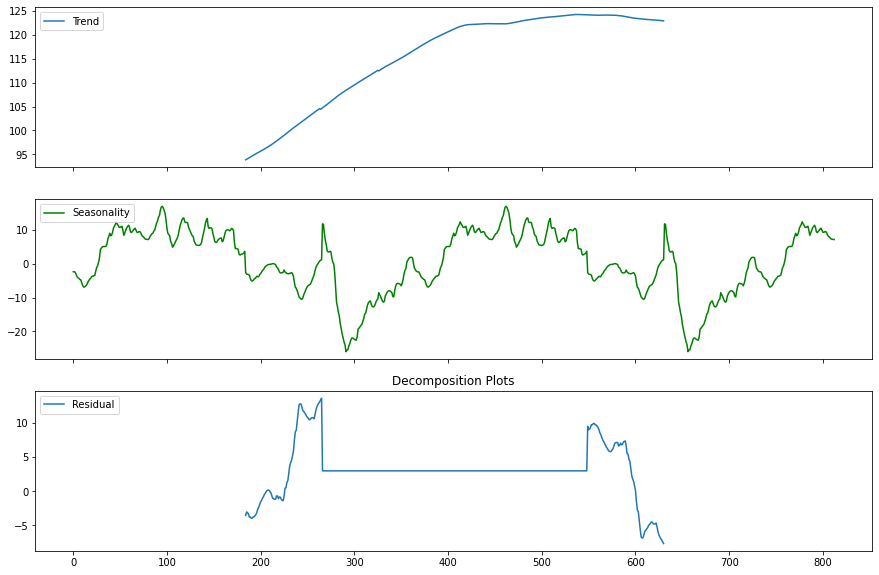

In [ ]:
plot_timeseries(df['y'])

##3.Modeling using Prophet

In [ ]:
ph=Prophet()
models=ph.fit(df)
future= ph.make_future_dataframe(periods=365)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigr7rlql/oxjz_k7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigr7rlql/z0rfbb6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35404', 'data', 'file=/tmp/tmpigr7rlql/oxjz_k7l.json', 'init=/tmp/tmpigr7rlql/z0rfbb6s.json', 'output', 'file=/tmp/tmpigr7rlql/prophet_modelhzypql5r/prophet_model-20230216142623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future.tail()

,ds
1171,2019-12-27
1172,2019-12-28
1173,2019-12-29
1174,2019-12-30
1175,2019-12-31


In [ ]:
forecast= models.predict(future)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1171,2019-12-27,130.079465,122.117659,139.219347
1172,2019-12-28,129.890042,120.590095,138.583937
1173,2019-12-29,129.721449,120.853308,138.840471
1174,2019-12-30,129.579582,120.360448,138.720442
1175,2019-12-31,127.693366,118.983996,136.173440


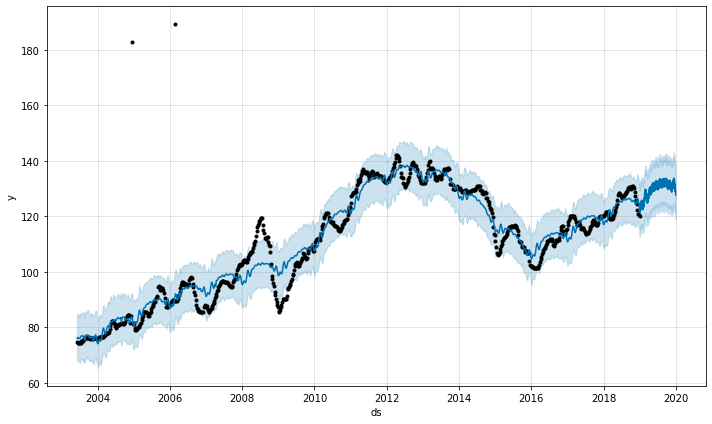

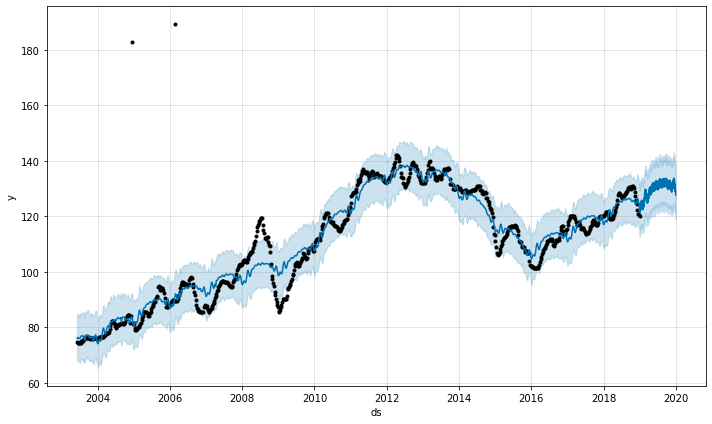

In [ ]:
ph.plot(forecast)

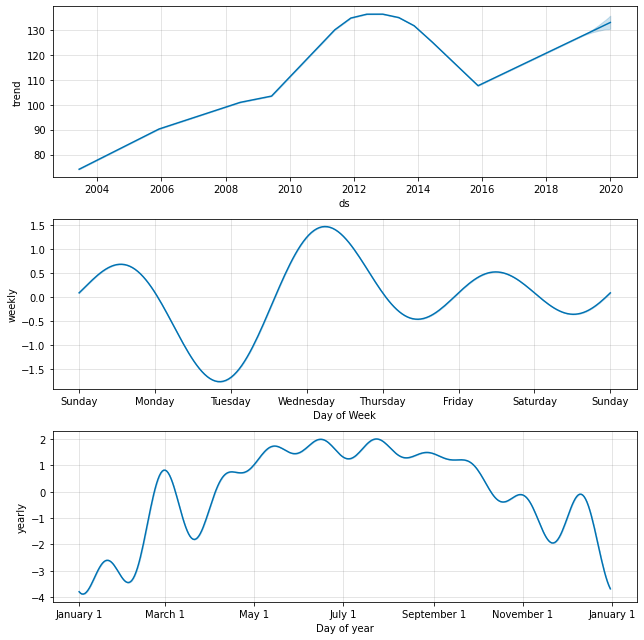

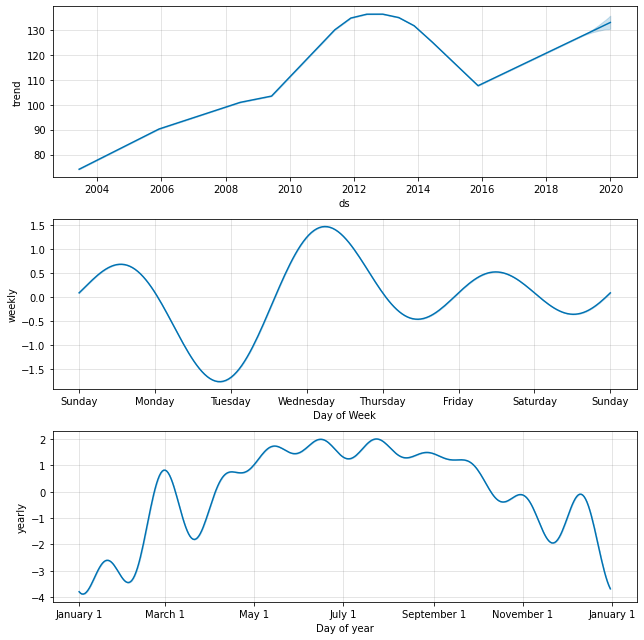

In [ ]:
ph.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1171,2019-12-27,132.926638,122.117659,139.219347,130.451485,135.641702,-2.847173,-2.847173,-2.847173,0.085739,0.085739,0.085739,-2.932911,-2.932911,-2.932911,0.0,0.0,0.0,130.079465
1172,2019-12-28,132.943485,120.590095,138.583937,130.453865,135.659108,-3.053442,-3.053442,-3.053442,0.085739,0.085739,0.085739,-3.139181,-3.139181,-3.139181,0.0,0.0,0.0,129.890042
1173,2019-12-29,132.960331,120.853308,138.840471,130.455082,135.676513,-3.238883,-3.238883,-3.238883,0.085737,0.085737,0.085737,-3.324620,-3.324620,-3.324620,0.0,0.0,0.0,129.721449
1174,2019-12-30,132.977178,120.360448,138.720442,130.456960,135.693919,-3.397595,-3.397595,-3.397595,0.088710,0.088710,0.088710,-3.486305,-3.486305,-3.486305,0.0,0.0,0.0,129.579582
1175,2019-12-31,132.994024,118.983996,136.173440,130.458838,135.711324,-5.300658,-5.300658,-5.300658,-1.678740,-1.678740,-1.678740,-3.621918,-3.621918,-3.621918,0.0,0.0,0.0,127.693366


In [ ]:
df_ph= pd.concat([df, forecast['yhat']], axis=1)

In [ ]:
df_ph.head()

,ds,y,yhat
0,2003-06-09,74.59,75.990038
1,2003-06-16,74.47,76.310233
2,2003-06-23,74.42,76.222349
3,2003-06-30,74.35,75.943819
4,2003-07-07,74.28,75.959328


##4. Performance calculating Error

In [ ]:

# Calculating the error
mse_prophet = mean_squared_error(df_ph['y'],df_ph['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(df_ph['y'],df_ph['yhat']))
mae_prophet = mean_absolute_error(df_ph['y'],df_ph['yhat'])
r2_prophet = r2_score(df_ph['y'],df_ph['yhat'])
print("Mean Squared Error: ", mse_prophet)
print("Root Mean Squared Error: ", rmse_prophet)
print("Mean absolute Error: ", mae_prophet)
print("R2 Score: ", r2_prophet)

Mean Squared Error:  44.38995985865955
Root Mean Squared Error:  6.662579069599066
Mean absolute Error:  3.676115052476488
R2 Score:  0.8799514021678568
